## Avacado Project

#### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
<ul>
<li>Date - The date of the observation</li>
<li>AveragePrice - the average price of a single avocado</li>
<li>type - conventional or organic</li>
<li>year - the year</li>
<li>Region - the city or region of the observation</li>
<li>Total Volume - Total number of avocados sold</li>
<li>4046 - Total number of avocados with PLU 4046 sold</li>
<li>4225 - Total number of avocados with PLU 4225 sold</li>
<li>4770 - Total number of avocados with PLU 4770 sold</li>
</ul>

#### Inspiration /Label 
Your task is to make a model that can consider the data provided and predict the Average Price.
To download the dataset, use the link given below. 

#### Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv

### Code starts from here......

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
avocado_data  = pd.read_csv(
    'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv',
    parse_dates=['Date'])
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
# creating a copy for original dataframe
avocado_data_analysis = avocado_data.copy()
avocado_data_analysis.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
avocado_data_analysis.shape

(16468, 14)

So, the data has 16468 rows and 14 columns

In [5]:
avocado_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   float64       
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   float64       
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 1.8+ MB


#### Out of 16458 rows, only 1517 rows have non-zero values for all the features/columns
#### Column 'Unnamed: 0' is of no use so will drop the same
#### Also, column 'year' can be derived from column 'Date'

In [6]:
avocado_data_analysis.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# checking the null values

avocado_data_analysis[avocado_data_analysis.isnull().any(axis=1)]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1517,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Removing all the null values
avocado_data_analysis = avocado_data_analysis[avocado_data_analysis.notnull().any(axis=1)]
avocado_data_analysis

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [9]:
# checking whether Year value in 'Date' column is equal to the value column 'year' 
avocado_data_analysis[avocado_data_analysis.Date.dt.year==avocado_data_analysis.year].shape

(1517, 14)

In [10]:
# creating a column for month
avocado_data_analysis['month'] = avocado_data_analysis['Date'].dt.month

In [11]:
avocado_data_analysis.drop(['Unnamed: 0', 'Date'], axis= 1, inplace=True)
avocado_data_analysis.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


### checking the categorical features so that Ican apply one hot encoding

In [12]:
# checking the feature/column : type
avocado_data_analysis.type.value_counts()

conventional    1517
Name: type, dtype: int64

#### It has only 1 value at all the places

In [36]:
# checking the feature/column : region
avocado_data_analysis.region.value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

#### Creating a DataFrame for the column region and checking the contribution of each region in terms of percentage

In [37]:
avocado_region_data = avocado_data_analysis.region.value_counts()
avocado_region_data= pd.DataFrame(avocado_region_data)
avocado_region_data['Percentage'] = round(avocado_region_data['region']/avocado_data_analysis.region.count()*100,2)
print(avocado_region_data.shape)
avocado_region_data

(51, 2)


,region,Percentage
California,76,5.01
Albany,67,4.42
BaltimoreWashington,65,4.28
Boise,65,4.28
Boston,62,4.09
Atlanta,54,3.56
PhoenixTucson,52,3.43
BuffaloRochester,51,3.36
Spokane,49,3.23
Columbus,47,3.10


#### Column 'region' has 51 different types of variables, so in case we need to apply 'One hot encoding' then we will have 50 new columns. So, we should also need to consider PCA to reduce the dimensions of  our data.

In [40]:
avocado_data_analysis_region = pd.get_dummies(avocado_data_analysis['region'], columns = ['region'], drop_first = True)
avocado_data_analysis_region

,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,Columbus,DallasFtWorth,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components =1)

pca_region = pca.fit_transform(avocado_data_analysis_region)
pca_region

array([[-0.01915092],
       [-0.01915092],
       [-0.01915092],
       ...,
       [-0.03288175],
       [-0.03288175],
       [-0.03288175]])

In [65]:
pca_region.shape

(1517, 1)

In [66]:
pca_region_df = pd.DataFrame(data = pca_region, columns =['region'])
pca_region_df

,region
0,-0.019151
1,-0.019151
2,-0.019151
3,-0.019151
4,-0.019151
...,...
1512,-0.032882
1513,-0.032882
1514,-0.032882
1515,-0.032882


In [67]:
# convert the categorical columns to numerical columns

avocado_data_analysis = pd.get_dummies(avocado_data_analysis, columns = ['type'], drop_first = False)
avocado_data_analysis

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,type_conventional
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany,12,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany,12,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany,12,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany,6,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte,10,1
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte,9,1
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte,2,1
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte,9,1


In [32]:
avocado_data_analysis.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000


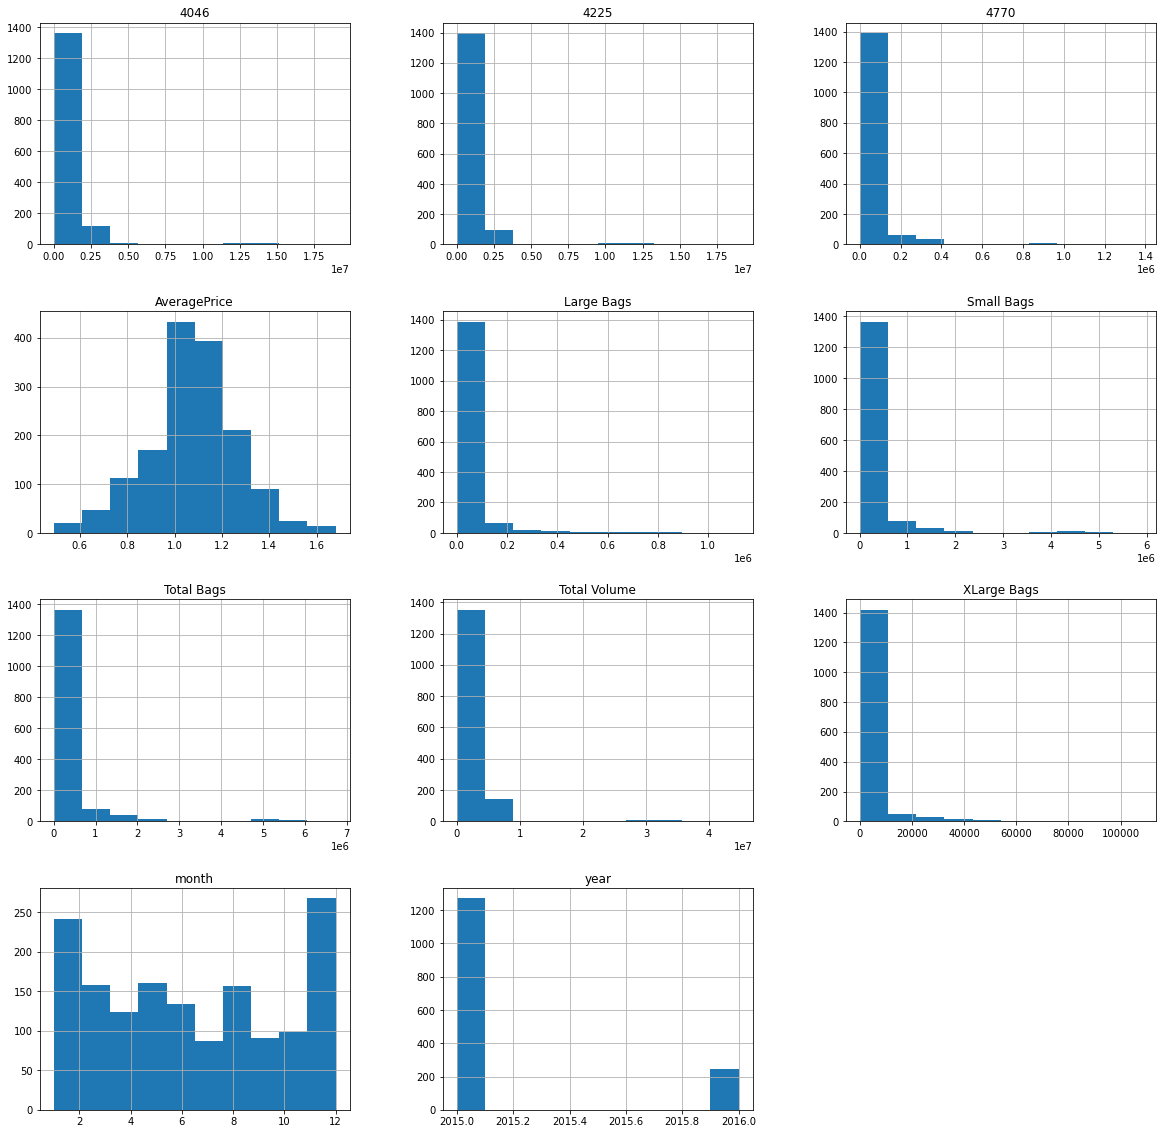

In [33]:
# Plotting a histogram to check the distribution of all the variables/columns
avocado_data_analysis.hist(bins=10,figsize = (20,20))
plt.show()